In [257]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.neighbors import KDTree

In [278]:
pre = np.array([2.2172601222991943, 2.222874402999878, 2.205129384994507, 2.1986029148101807, 2.1858696937561035, 2.1957268714904785, 2.1969168186187744, 2.183438539505005, 2.190436601638794, 2.1827948093414307, 2.1837754249572754, 2.2076597213745117, 2.177976131439209, 2.1731295585632324, 2.185473918914795, 2.1618497371673584, 2.1733145713806152, 2.181365728378296, 2.1715705394744873, 2.1802971363067627, 2.1772191524505615, 2.1959474086761475, 2.1840665340423584, 0.5597301125526428, 0.5485700964927673, 0.5352249145507812, 0.5243845582008362, 0.5171780586242676, 0.49347609281539917, 0.500745415687561, 0.5121733546257019, 0.5016278624534607, 0.5036090016365051, 0.5045422911643982, 0.5057468414306641, 0.48604974150657654, 0.4834277033805847, 0.49271881580352783, 0.4894062876701355, 0.47749894857406616, 0.47225064039230347, 0.47715726494789124, 0.48048126697540283, 0.4855308532714844, 0.4973067045211792, 0.4793863892555237, 0.4819462299346924, 0.4518357813358307, 0.48269888758659363, 0.4819696545600891, 0.4706280529499054, 0.4844808280467987, 0.4945412874221802, 0.5085427761077881, 0.49312782287597656, 0.500328540802002, 0.49513912200927734, 0.4999622404575348, 0.5043498277664185, 0.5245479345321655, 0.541199266910553, 0.5258843302726746, 0.5450403690338135, 0.5684719681739807, 1.9805926084518433, 1.992526888847351, 1.988566279411316, 2.026911735534668, 2.0081746578216553, 2.046605110168457, 2.0853240489959717, 2.075857162475586, 2.0827317237854004, 2.1258904933929443, 2.14408540725708, 2.169947624206543, 2.1946492195129395, 2.1616666316986084, 2.172661781311035, 2.154602289199829, 2.1330761909484863, 2.13897442817688, 2.137460470199585, 2.13767671585083, 2.098261594772339, 2.0943005084991455, 2.0957398414611816, 2.0956742763519287, 2.087766170501709, 2.091048002243042, 2.1002793312072754, 2.0828135013580322, 2.063037872314453, 2.0801477432250977, 2.062371015548706, 2.0871875286102295, 2.083261013031006, 2.0732927322387695, 2.08502197265625, 2.0588319301605225, 2.0332274436950684, 2.0723254680633545, 2.0552995204925537, 2.057854413986206, 2.069274663925171, 2.032874822616577, 2.0648837089538574, 2.072674512863159, 2.062706470489502, 2.045621633529663, 2.0590219497680664, 2.059302568435669, 2.0588607788085938, 2.0754079818725586, 2.0734634399414062, 2.0726094245910645, 2.0943069458007812, 2.0891125202178955, 2.0705318450927734, 2.0788536071777344, 2.10817289352417, 2.1069400310516357, 2.109229326248169, 2.101857900619507, 2.1055896282196045, 2.115345001220703, 2.119300127029419, 2.1327497959136963, 2.1400115489959717, 2.1617844104766846, 2.134272575378418, 2.146404266357422, 2.1694626808166504, 2.1619796752929688, 2.190279006958008, 2.1727895736694336, 1.1113004684448242, 1.100041389465332, 1.0575999021530151, 1.0355123281478882, 1.0419548749923706, 1.037386417388916, 1.0438101291656494, 0.994590163230896, 1.027056336402893, 1.0087417364120483, 1.0027227401733398, 1.0239629745483398, 1.0005853176116943, 1.017919659614563, 1.0248370170593262, 1.0239020586013794, 1.0181171894073486, 1.0272765159606934, 1.0323562622070312, 1.0463443994522095, 1.0655380487442017, 1.0990997552871704, 2.132075071334839, 2.1586179733276367, 2.149562358856201, 2.172996759414673, 2.202742576599121, 2.2174174785614014, 2.2322938442230225, 2.2515151500701904, 2.286550283432007, 2.2972664833068848, 2.330606698989868, 2.3576974868774414, 2.3825862407684326, 2.4172351360321045, 2.4361069202423096, 2.461888313293457, 2.5018298625946045, 2.4925389289855957, 2.4813530445098877, 2.452197313308716, 2.4803617000579834, 2.4636669158935547, 2.4398932456970215])

In [261]:
def convert_scan_to_pointcloud(scan):
    """
    把激光消息转换为激光坐标系下的二维点云
    """
    angle_min=-1.0466699600219727
    angle_max=1.0466699600219727
    angle_increment=0.011629666201770306
    n = len(scan)
    pcs = np.zeros((n, 2))
    angle = angle_min
    for i in range(n):
        if scan[i] < 0.07999999821186066 or scan[i] > 6.0:
            continue
        angle += angle_increment
        # 计算单个值的三角函数，math比numpy的快
        lx = scan[i] * math.sin(angle)
        ly = scan[i] * math.cos(angle)
        if not lx or not ly:
            continue
        pcs[i][0] = lx
        pcs[i][1] = ly

    return pcs

In [280]:
y_data_pre = convert_scan_to_pointcloud(pre)

In [289]:
# y_data_now = convert_scan_to_pointcloud(now)

## 已知对应点关系的ICP

### 创造对应点的数据

In [318]:
# 创造一下数据
# 为已知的点云进行变换，假设为旋转pi/8,平移距离为（1，1）
theta = 3.1415926/4
t = np.array([0.5, 0.5])
R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
y_data_now = (R @ y_data_pre.T).T + t
print("the rotation matrix should be:\n {}".format(R))

the rotation matrix should be:
 [[ 0.70710679 -0.70710677]
 [ 0.70710677  0.70710679]]


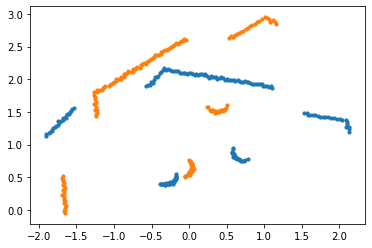

In [319]:
# 画出两点云
plt.scatter(y_data_pre[:,0], y_data_pre[:,1], marker='o', s=10)
plt.scatter(y_data_now[:,0], y_data_now[:,1], marker='o', s=10)

### ICP数据匹配实验

In [320]:
# 通过匹配已知匹配的点云计算相对姿态
def icp(y_data_pre, y_data_now):
    """
    y_data_pre: shape=(n, 2)
    y_data_now: the same snow_tmhape of y_data_pre = (n, 2)
    
    return: R and t. The transformation from pre to now
    """
    total_R = np.eye(3)
    
    pre_tm, now_tm = y_data_pre, y_data_now

    pre_t, now_t = pre_tm - np.mean(pre_tm, axis=0), now_tm - np.mean(now_tm, axis=0)

    W = np.zeros((2,2))

    for i in range(pre_t.shape[0]):
        W += pre_t[i:i+1].T @ now_t[i:i+1]

    U, sigma, V = np.linalg.svd(W)
    R = V @ U.T
    t = np.mean(now_tm, axis=0) - R@np.mean(pre_tm, axis=0).T
    
    return trans_to_isometry2d(R, t)

可以看见，通过ICP可以一次直接计算出来相对应的旋转关系。和我们之前设置的R和t保持一致

In [302]:
icp(y_data_pre, y_data_now)

array([[ 0.70710679, -0.70710677,  0.5       ],
       [ 0.70710677,  0.70710679,  0.5       ],
       [ 0.        ,  0.        ,  1.        ]])

对y_data_pre进行旋转平移，后画图

In [311]:
y_data_from_icp = (icp(y_data_pre, y_data_now) @ np.hstack((y_data_pre, np.ones((y_data_pre.shape[0], 1)))).T).T

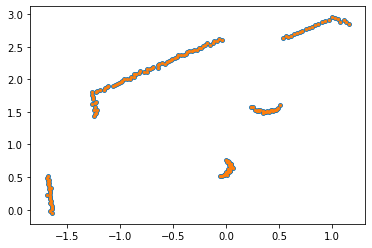

In [317]:
plt.scatter(y_data_from_icp[:,0], y_data_from_icp[:,1], marker='o', s=15)
plt.scatter(y_data_now[:,0], y_data_now[:,1], marker='o', s=5)

In [273]:
# pre_tm, now_tm = y_data_pre, y_data_now

# pre_t, now_t = pre_tm - np.mean(pre_tm, axis=0), now_tm - np.mean(now_tm, axis=0)

# W = np.zeros((2,2))

# for i in range(pre_t.shape[0]):
#     W += pre_t[i:i+1].T @ now_t[i:i+1]

# U, sigma, V = np.linalg.svd(W)
# R = V @ U.T
# t = np.mean(now_tm, axis=0) - R@np.mean(pre_tm, axis=0).T

## 未知对应点关系的ICP

In [321]:
def find_correspend_point(y_data_pre, y_data_now):
    # 寻找对应点, 建立上一帧数据的KD树，循环下一帧的点
    # 寻找距离此点最近的在上一帧中的数据，保存到data_from_pre
    kdt = KDTree(y_data_now)
    data_from_now = []
    for point_idx in range(y_data_pre.shape[0]):
        point = y_data_pre[point_idx:point_idx+1]
        dist, idx = kdt.query(point, k=1)
        data_from_now.append(y_data_now[idx.squeeze()])
    return y_data_pre, data_from_now

In [339]:
def icpp(y_data_pre, y_data_now):
    """
    y_data_pre: shape=(n, 2)
    y_data_now: the same snow_tmhape of y_data_pre = (n, 2)
    
    return: R and t. The transformation from pre to now
    """
    total_R = np.eye(3)
    
    for j in range(9):
        pre_tm, now_tm = find_correspend_point(y_data_pre, y_data_now)
        
        pre_t, now_t = pre_tm - np.mean(pre_tm, axis=0), now_tm - np.mean(now_tm, axis=0)
        
        W = np.zeros((2,2))

        for i in range(pre_t.shape[0]):
            W += pre_t[i:i+1].T @ now_t[i:i+1]

        U, sigma, V = np.linalg.svd(W)
        R = V @ U.T
        t = np.mean(now_tm, axis=0) - R@np.mean(pre_tm, axis=0).T
        
        y_data_pre = (R @ pre_tm.T).T + t
        
        total_R = trans_to_isometry2d(R, t) @ total_R
        
        plt.subplot(3,3,j+1)
#         y_data_from_icp = (total_R @ np.hstack((y_data_pre, np.ones((y_data_pre.shape[0], 1)))).T).T
        plt.scatter(y_data_pre[:,0], y_data_pre[:,1], marker='o', s=5)
        plt.scatter(y_data_now[:,0], y_data_now[:,1], marker='o', s=1)
        
        
    return total_R

array([[ 0.71306327, -0.70109969,  0.49321953],
       [ 0.70109969,  0.71306327,  0.49672066],
       [ 0.        ,  0.        ,  1.        ]])

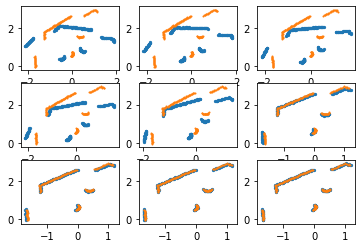

In [340]:
icpp(y_data_pre, y_data_now)

In [78]:
def trans_to_isometry2d(R, t):
    res = np.eye(3)
    res[:2, :2] = R
    res[:2, 2] = t.squeeze()
    return res

In [51]:
icp(y_data_pre, y_data_now)

array([[ 1.00000000e+00,  1.14834421e-16,  1.20000000e-01],
       [-5.60301033e-17,  1.00000000e+00,  1.12000000e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [52]:
# 寻找对应点, 建立上一帧数据的KD树，循环下一帧的点
# 寻找距离此点最近的在上一帧中的数据，保存到data_from_pre
kdt = KDTree(y_data_now)
data_from_now = []
for point_idx in range(y_data_pre.shape[0]):
    point = y_data_pre[point_idx:point_idx+1]
    dist, idx = kdt.query(point, k=1)
    data_from_now.append(y_data_now[idx.squeeze()])

icp(y_data_pre, data_from_now)

array([[ 0.99966573, -0.02585395,  0.07092335],
       [ 0.02585395,  0.99966573,  0.07573615],
       [ 0.        ,  0.        ,  1.        ]])

In [53]:
p = np.hstack((y_data_pre, np.ones((y_data_pre.shape[0], 1))))

In [54]:
tran_p = np.hstack((now_t, np.ones((y_data_now.shape[0], 1))))

trans_to_isometry2d(R, t)

array([[ 1.00000000e+00,  2.36658972e-17,  1.20000000e-01],
       [-1.70866857e-17,  1.00000000e+00,  1.12000000e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

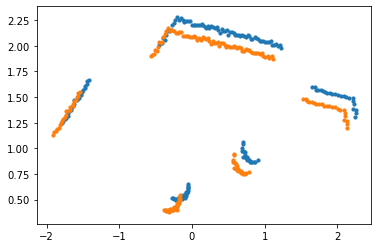

In [55]:
plt.scatter(y_data_now[:,0], y_data_now[:,1], marker='o', s=10)
plt.scatter(y_data_pre[:,0], y_data_pre[:,1], s=10)

In [151]:
# 转变为isometry2D
R, t = np.eye(2), np.zeroXs((2, 1))
iso_R = trans_to_isometry2d(R, t)
y_data_now_p = np.hstack((y_data_now, np.ones((y_data_now.shape[0], 1))))
# 相乘，转换到y_data_pre的位置上
next_p = (iso_R @ y_data_now_p.T).T

In [70]:
# 寻找对应点, 建立上一帧数据的KD树，循环下一帧的点
# 寻找距离此点最近的在上一帧中的数据，保存到data_from_pre
kdt = KDTree(y_data_pre)
data_from_pre = []
for point_idx in range(next_p.shape[0]):
    point = next_p[point_idx:point_idx+1, :2]
    dist, idx = kdt.query(point, k=1)
    data_from_pre.append(y_data_pre[idx.squeeze()])

In [71]:
data_from_pre = np.array(data_from_pre)
data_from_now = y_data_now_p[:, :2]

In [72]:
# 开始计算ICP的位置
# 去中心化
data_from_pre = data_from_pre - np.mean(data_from_pre, axis=0)
data_from_now = data_from_now - np.mean(data_from_now, axis=0)

In [73]:
W = 0
for i in range(data_from_pre.shape[0]):
    W += data_from_pre[i:i+1].T @ data_from_now[i:i+1]
    U, sigma, V = np.linalg.svd(W)
R = V.T @ U.T
t = np.mean(data_from_pre, axis=0) - R @ np.mean(data_from_now, axis=0)

In [71]:
total_R

array([[ 0.99909739, -0.04247833,  0.01196518],
       [ 0.04247833,  0.99909739, -0.00719744],
       [ 0.        ,  0.        ,  1.        ]])

In [75]:
def v2r(v):
    return np.array([[np.cos(v[2]), -np.sin(v[2]), v[0]],
                    [np.sin(v[2]), np.cos(v[2]), v[1]],
                    [0, 0, 1]])

def r2v(r):
    return np.array([r[0, 2], r[0, 1], np.arctan2(r[1, 0], r[0, 0])])

In [79]:
init = np.array([2,2,3.1415926535/4])

In [94]:
a = v2r(init)
a

array([[ 0.70710678, -0.70710678,  2.        ],
       [ 0.70710678,  0.70710678,  2.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [95]:
b = v2r( np.array([1,2, 31415926535/4]))
b

array([[ 0.9749093 ,  0.22260246,  1.        ],
       [-0.22260246,  0.9749093 ,  2.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [104]:
c=b@a
c

array([[ 0.84676869, -0.53196127,  3.39502352],
       [ 0.53196127,  0.84676869,  3.50461369],
       [ 0.        ,  0.        ,  1.        ]])

In [99]:
c=a@b
c

array([[ 0.84676869, -0.53196127,  1.29289322],
       [ 0.53196127,  0.84676869,  4.12132034],
       [ 0.        ,  0.        ,  1.        ]])

In [100]:
test_point = [1,2,1]

In [101]:
a@b@test_point

array([1.07573936, 6.34681898, 1.        ])

In [102]:
c@test_point


array([1.07573936, 6.34681898, 1.        ])

## Testing for real data

In [171]:
import re
with open("abc.txt", "r") as f:
    data_13 = re.split("\n| ", f.read())
for i in data_13:
    if i == "":
        data_13.remove(i)
data = list(map(float, data_13))
data = np.array(data)
data.resize((13,181,2))

In [172]:
data.shape

(13, 181, 2)

In [175]:
y_data_pre, y_data_now = data[0], data[1]

In [174]:
pre.shape

(181, 2)

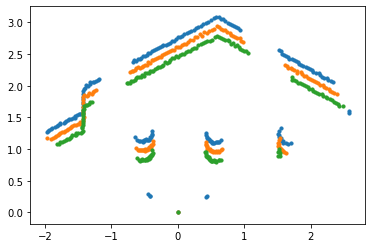

In [229]:
plt.scatter(data[0][:,0], data[0][:,1], marker='o', s=10)
plt.scatter(data[6][:,0], data[6][:,1], marker='o', s=10)
plt.scatter(data[12][:,0], data[12][:,1], marker='o', s=10)


In [230]:
icpp(data[0], data[12])

array([[ 0.99999758, -0.00219806,  0.01754253],
       [ 0.00219806,  0.99999758, -0.28312554],
       [ 0.        ,  0.        ,  1.        ]])

In [255]:

n = np.eye(3)
for i in range(11,0,-1):
    n = n @ icpp(data[i+1], data[i])
n

array([[ 0.99988288,  0.01530425, -0.00663943],
       [-0.01530425,  0.99988288,  0.26661462],
       [ 0.        ,  0.        ,  1.        ]])

In [226]:
b=(n@np.hstack((data[0], np.ones((data[0].shape[0], 1)))).T).T

In [227]:
b = b[:,:2]

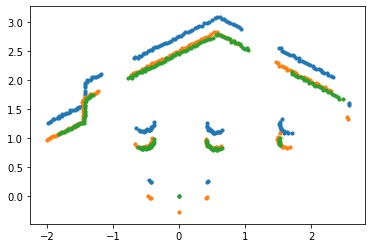

In [228]:
plt.scatter(data[0][:,0], data[0][:,1], marker='o', s=10)

plt.scatter(b[:,0], b[:,1], marker='o', s=10)
plt.scatter(data[12][:,0], data[12][:,1], marker='o', s=10)

In [237]:
origin = np.zeros(3)

In [246]:
now_iso = icpp(data[12], data[0]) @ v2r(origin)

In [247]:
now_iso

array([[ 0.99994642, -0.01035162,  0.00359686],
       [ 0.01035162,  0.99994642,  0.29184802],
       [ 0.        ,  0.        ,  1.        ]])

In [244]:
now_pose = np.array([now_iso[0, 2], now_iso[1, 2], np.arctan2(now_iso[1, 0], now_iso[0, 0])])


In [256]:
icpp(data[12], data[0])

array([[ 0.99994642, -0.01035162,  0.00359686],
       [ 0.01035162,  0.99994642,  0.29184802],
       [ 0.        ,  0.        ,  1.        ]])

## Testing for rotation